In [ ]:
###
# STUDENT: Ghițan Răzvan Florian
# GRUPA: 343C4
##

# Mă asigur că am pachetele necesare instalate.

%pip install matplotlib
%pip install scikit-learn
%pip install numpy

from copy import deepcopy
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def generate_simple_dataset(n_samples, noise):
    X, y = datasets.make_regression(n_samples = n_samples, n_features = 1, n_informative = 1, noise = noise, shuffle = False, random_state = 37)

    # Pentru a nu avea costul foarte mare, facem y subunitar
    return X, y / 100
    
def complex_gen(n_samples):
    x = np.linspace(-10, 10, n_samples)
    noise_sample = np.random.normal(0,0.5,n_samples)
    sine_wave = x + np.sin(4*x) + noise_sample
    
    # Facem shuffle simultan pe cei doi vectori. Compunem o listă de tupluri, dăm shuffle și după spargem tuplurile.
    #   Pentru SGD în special.
    data = [(x[i], sine_wave[i]) for i in range(n_samples)]
    random.shuffle(data)
    
    x = np.array([data[i][0] for i in range(n_samples)]).reshape((n_samples, 1))
    sine_wave = np.array([data[i][1] for i in range(n_samples)])
    return x, sine_wave

In [3]:
class LinearRegression(object):
    def fit(self, X, t):
        N, D = X.shape
        self.w = np.linalg.pinv(X) @ t
        self.var = np.mean(np.square(X @ self.w - t)) # variance
    
    def predict(self, X, return_std=True):
        N, D = X.shape
        y = X @ self.w
        if return_std:
            y_std = np.sqrt(self.var)
            return y, y_std
        return y

def extract_polynomial_features(X, M):
    res = []
    max_power = M + 1
    for line in X:
        l = [1]
        for power in range(1, M + 1):
            for element in line:
                if element >= 0:
                    l.append(pow(element, power))
                else:
                    l.append(-1 * pow(element, power))
        res.append(l)
    res = np.array(res)
    return res

def mean_squared_error(y, t):
    return np.mean((y - t) * (y- t))

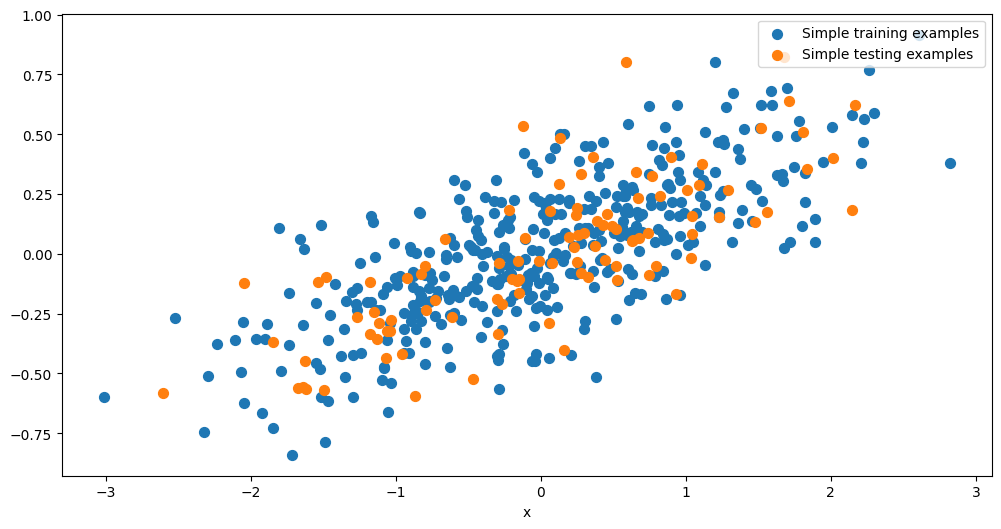

In [4]:
nr_samples = 500

split = 4 * nr_samples // 5

X_simple, t_simple = generate_simple_dataset(nr_samples, noise = 20)

X_simple_train, t_simple_train = X_simple[:split], t_simple[:split] # 4/5 for training
X_simple_test, t_simple_test = X_simple[split:], t_simple[split:] # 1/5 for testing

plt.figure(figsize=(12,6))
plt.scatter(X_simple_train, t_simple_train, s=50, label="Simple training examples")
plt.scatter(X_simple_test, t_simple_test, s=50, label="Simple testing examples")
plt.xlabel("x")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.show()

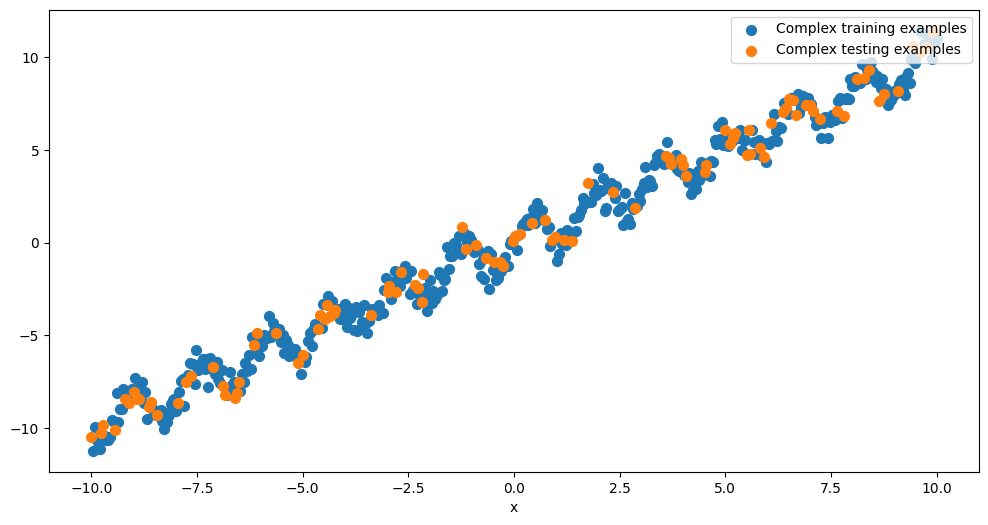

In [5]:
nr_samples = 500
split = 4 * nr_samples // 5

X_complex, t_complex = complex_gen(nr_samples)

X_complex_train, t_complex_train = X_complex[:split], t_complex[:split] # 4/5 for training
X_complex_test, t_complex_test = X_complex[split:], t_complex[split:] # 1/5 for testing

plt.figure(figsize=(12,6))
plt.scatter(X_complex_train, t_complex_train, s=50, label="Complex training examples")
plt.scatter(X_complex_test, t_complex_test, s=50, label="Complex testing examples")
plt.xlabel("x")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.show()

Train error: 0.0421843312263433
Test  error: 0.03941627411921387


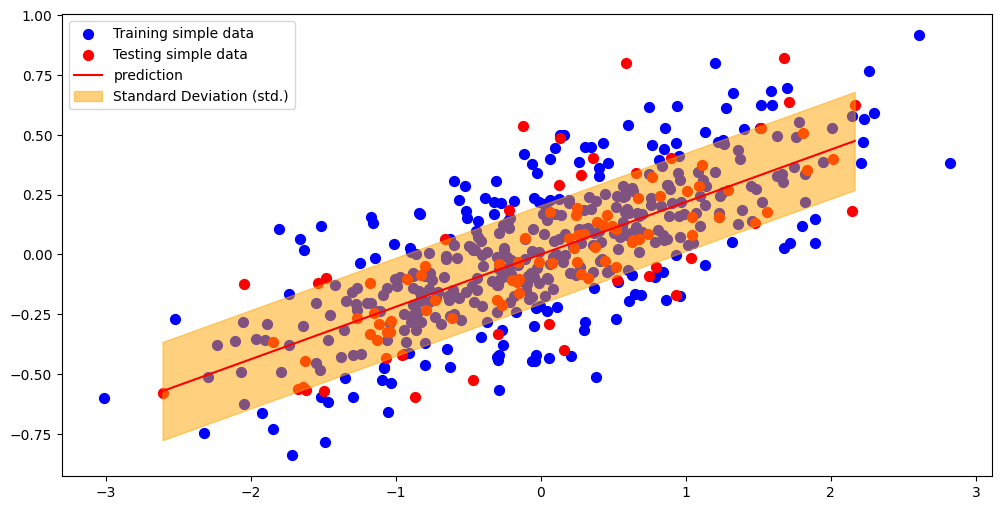

In [6]:
model = LinearRegression()

X_train_0 = X_simple_train
X_test_0 = X_simple_test

model.fit(X_train_0, t_simple_train)
y_train_0, y_std = model.predict(X_train_0)
y_test_0, y_test_std = model.predict(X_test_0)

print("Train error:", mean_squared_error(y_train_0, t_simple_train))
print("Test  error:", mean_squared_error(y_test_0, t_simple_test))

data = [(X_simple_test[i], y_test_0[i]) for i in range(len(X_simple_test))]
data = sorted(data)
X_test_sorted = np.array([data[i][0] for i in range(len(data))]).reshape((len(data), 1))
y_test_sorted = np.array([data[i][1] for i in range(len(data))])

X_simple_save0 = X_test_sorted
y_simple_save0 = y_test_sorted

plt.figure(figsize=(12,6))
plt.scatter(X_simple_train, t_simple_train, color='b', s=50, label='Training simple data')
plt.scatter(X_simple_test, t_simple_test, color='r', s=50, label='Testing simple data')
plt.plot(X_test_sorted, y_test_sorted, label='prediction', color='r')
plt.fill_between(
    np.squeeze(X_test_sorted), y_test_sorted - y_test_std, y_test_sorted + y_test_std,
    color="orange", alpha=0.5, label="Standard Deviation (std.)")
plt.legend()
plt.show()

Train error: 0.7624019038061555
Test  error: 0.6319480342452622


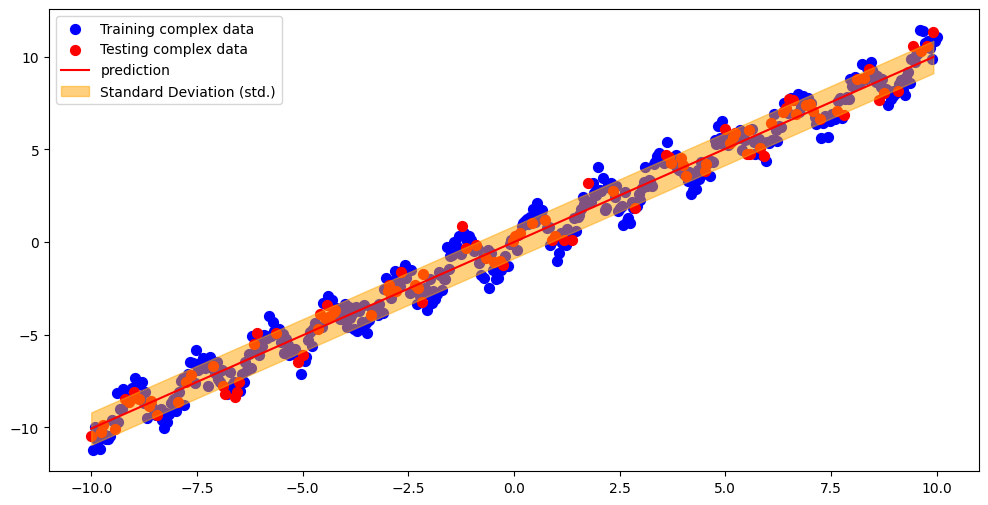

In [7]:
model = LinearRegression()

X_train_0 = X_complex_train
X_test_0 = X_complex_test

model.fit(X_train_0, t_complex_train)
y_train_0, y_std = model.predict(X_train_0)
y_test_0, y_test_std = model.predict(X_test_0)

print("Train error:", mean_squared_error(y_train_0, t_complex_train))
print("Test  error:", mean_squared_error(y_test_0, t_complex_test))

data = [(X_complex_test[i], y_test_0[i]) for i in range(len(X_complex_test))]
data = sorted(data)
X_test_sorted = np.array([data[i][0] for i in range(len(data))]).reshape((len(data), 1))
y_test_sorted = np.array([data[i][1] for i in range(len(data))])

X_complex_save0 = X_test_sorted
y_complex_save0 = y_test_sorted

plt.figure(figsize=(12,6))
plt.scatter(X_complex_train, t_complex_train, color='b', s=50, label='Training complex data')
plt.scatter(X_complex_test, t_complex_test, color='r', s=50, label='Testing complex data')
plt.plot(X_test_sorted, y_test_sorted, label='prediction', color='r')
plt.fill_between(
    np.squeeze(X_test_sorted), y_test_sorted - y_test_std, y_test_sorted + y_test_std,
    color="orange", alpha=0.5, label="Standard Deviation (std.)")
plt.legend()
plt.show()

Train error: 0.04271075929792856
Test  error: 0.04158823388934087


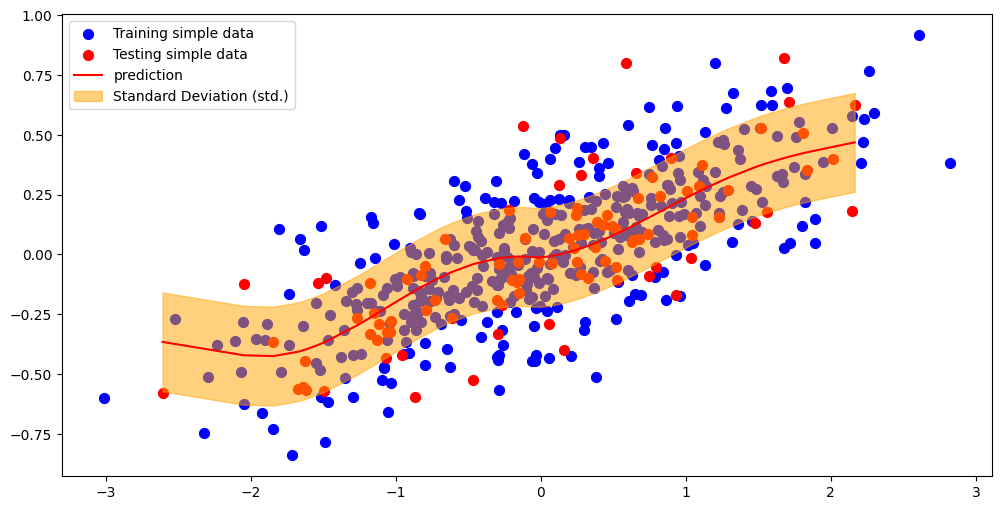

In [8]:
model = LinearRegression()

# Testăm pentru gradul polinomului 7.
X_train_feat = extract_polynomial_features(X_simple_train, 7)
X_test_feat = extract_polynomial_features(X_simple_test, 7)

model.fit(X_train_feat, t_simple_train)
y_train_1, y_std = model.predict(X_train_feat)
y_test_1, y_test_std = model.predict(X_test_feat)

print("Train error:", mean_squared_error(y_train_1, t_simple_train))
print("Test  error:", mean_squared_error(y_test_1, t_simple_test))

data = [(X_simple_test[i], y_test_1[i]) for i in range(len(X_simple_test))]
data = sorted(data)
X_test_sorted = np.array([data[i][0] for i in range(len(data))]).reshape((len(data), 1))
y_test_sorted = np.array([data[i][1] for i in range(len(data))])

X_simple_save1 = X_test_sorted
y_simple_save1 = y_test_sorted

plt.figure(figsize=(12,6))
plt.scatter(X_simple_train, t_simple_train, color='b', s=50, label='Training simple data')
plt.scatter(X_simple_test, t_simple_test, color='r', s=50, label='Testing simple data')
plt.plot(X_test_sorted, y_test_sorted, label='prediction', color='r')
plt.fill_between(
    np.squeeze(X_test_sorted), y_test_sorted - y_test_std, y_test_sorted + y_test_std,
    color="orange", alpha=0.5, label="Standard Deviation (std.)")
plt.legend()
plt.show()

Train error: 0.9214833665988406
Test  error: 0.6474566084715855


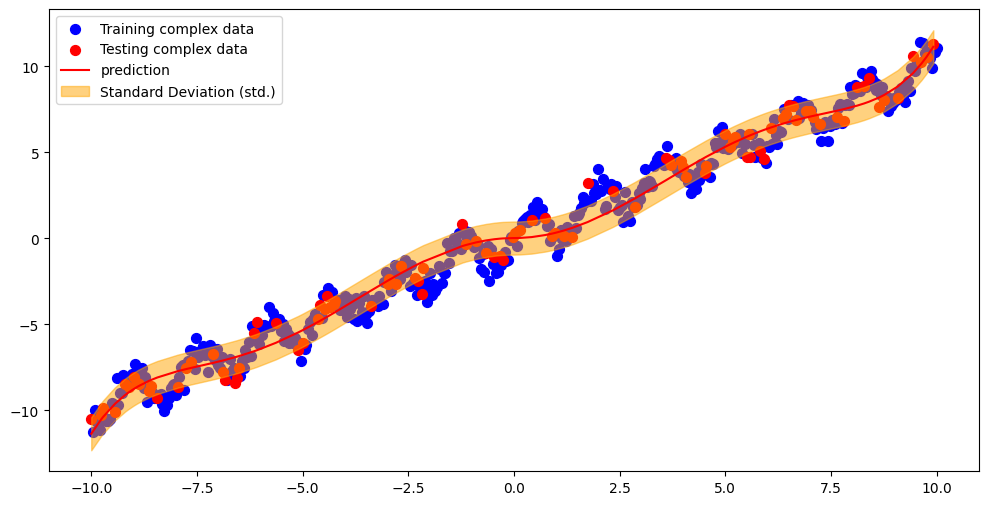

In [9]:
model = LinearRegression()

# Testăm pentru gradul polinomului 5.
X_train_feat = extract_polynomial_features(X_complex_train, 7)
X_test_feat = extract_polynomial_features(X_complex_test, 7)

model.fit(X_train_feat, t_complex_train)
y_train_1, y_std = model.predict(X_train_feat)
y_test_1, y_test_std = model.predict(X_test_feat)

print("Train error:", mean_squared_error(y_train_1, t_complex_train))
print("Test  error:", mean_squared_error(y_test_1, t_complex_test))

data = [(X_complex_test[i], y_test_1[i]) for i in range(len(X_complex_test))]
data = sorted(data)
X_test_sorted = np.array([data[i][0] for i in range(len(data))]).reshape((len(data), 1))
y_test_sorted = np.array([data[i][1] for i in range(len(data))])

X_complex_save1 = X_test_sorted
y_complex_save1 = y_test_sorted

plt.figure(figsize=(12,6))
plt.scatter(X_complex_train, t_complex_train, color='b', s=50, label='Training complex data')
plt.scatter(X_complex_test, t_complex_test, color='r', s=50, label='Testing complex data')
plt.plot(X_test_sorted, y_test_sorted, label='prediction', color='r')
plt.fill_between(
    np.squeeze(X_test_sorted), y_test_sorted - y_test_std, y_test_sorted + y_test_std,
    color="orange", alpha=0.5, label="Standard Deviation (std.)")
plt.legend()
plt.show()

In [10]:
def compute_cost(X, y, w):
    # Predicted output.
    f_w = w * X
    
    return 1/2 * np.mean(np.subtract(f_w, y) ** 2)  

def compute_gradient(X, y, w):
    # Predicted output.
    f_w = w * X
    
    # Derivative of J to w.
    dj_dw = np.subtract(f_w, y) * X
    dj_dw = np.sum(dj_dw) / X.shape[0]
    
    return dj_dw

def gradient_descent(X, y, w_init, learning_rate, epochs, batch_size, print_flag=False):
    w = deepcopy(w_init)
    costs = []

    nr_batches = X.shape[0] // batch_size
    if X.shape[0] % batch_size != 0:
        nr_batches += 1
    
    for i in range(1, epochs + 1):
        for batch in range(nr_batches):
            start = batch * batch_size
            end = min((batch + 1) * batch_size, X.shape[0])
            dj_dw = compute_gradient(X[start:end], y[start:end], w)
            w = w - learning_rate * dj_dw
        costs.append(compute_cost(X, y, w))
        if print_flag:
            if i % (epochs // 10) == 0 or i == epochs:
                print(f'Epoch {i}, w = {w}, dj_dw = {dj_dw}: Cost = {costs[-1]:0.7e}')
    return w, costs

def SGD(X, y, w_init, learning_rate, epochs, batch_size, print_flag=False):
    w = deepcopy(w_init)
    J_history = []
    nr_batches = X.shape[0] // batch_size
    if X.shape[0] % batch_size != 0:
        nr_batches += 1
    
    for i in range(1, epochs + 1):
        for batch in range(nr_batches):
            start = batch * batch_size
            end = min((batch + 1) * batch_size, X.shape[0])
            dj_dw = compute_gradient(X[start:end], y[start:end], w)
            w = w - learning_rate * dj_dw
        J_history.append(compute_cost(X, y, w))
        if print_flag:
            if i % (epochs // 10) == 0 or i == epochs:
                print(f'Epoch {i}, w = {w}, dj_dw = {dj_dw}: Cost = {J_history[-1]:0.7e}')
        
        data = [(X[i], y[i]) for i in range(X.shape[0])]
        random.shuffle(data)
    
        X = np.array([data[i][0] for i in range(X.shape[0])]).reshape((X.shape[0], 1))
        y = np.array([data[i][1] for i in range(X.shape[0])])
    return w, J_history

Epoch 40, w = 0.07229516289224376, dj_dw = -0.14770382135503293: Cost = 3.1828236e-02
Epoch 80, w = 0.12073882221433577, dj_dw = -0.09897361477640462: Cost = 2.5912762e-02
Epoch 120, w = 0.15320002756513934, dj_dw = -0.06632039937790238: Cost = 2.3256658e-02
Epoch 160, w = 0.17495168438819217, dj_dw = -0.04444008015248384: Cost = 2.2064043e-02
Epoch 200, w = 0.1895270696653181, dj_dw = -0.029778480565320956: Cost = 2.1528548e-02
Epoch 240, w = 0.1992937673336773, dj_dw = -0.019954012273077214: Cost = 2.1288105e-02
Epoch 280, w = 0.20583825185545743, dj_dw = -0.01337081671849316: Cost = 2.1180144e-02
Epoch 320, w = 0.21022359059636836, dj_dw = -0.008959538426301913: Cost = 2.1131669e-02
Epoch 360, w = 0.213162125450952, dj_dw = -0.006003621955370526: Cost = 2.1109903e-02
Epoch 400, w = 0.21513118362450817, dj_dw = -0.004022916680305342: Cost = 2.1100130e-02
w found by gradient descent: (0.21513118362450817)
Train error: 0.04220025969250045
Test  error: 0.039552835087763555


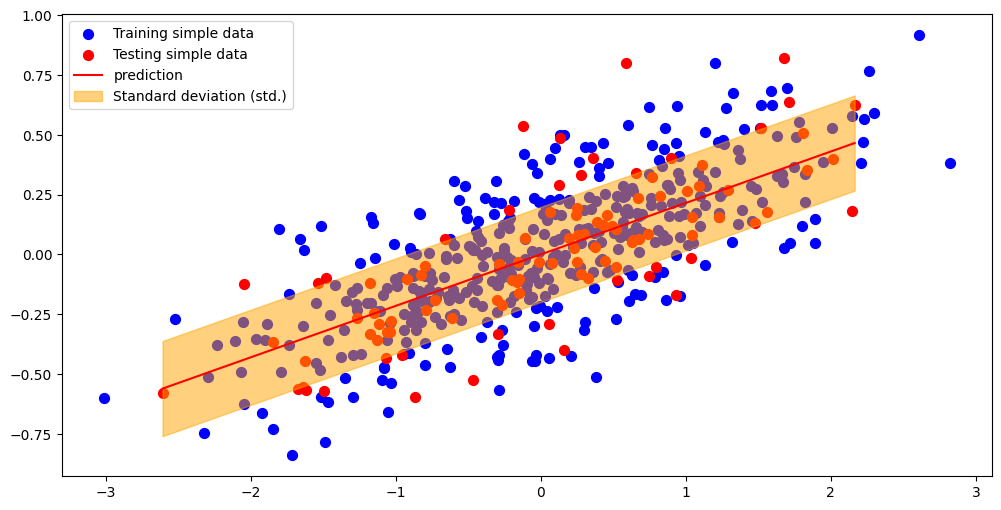

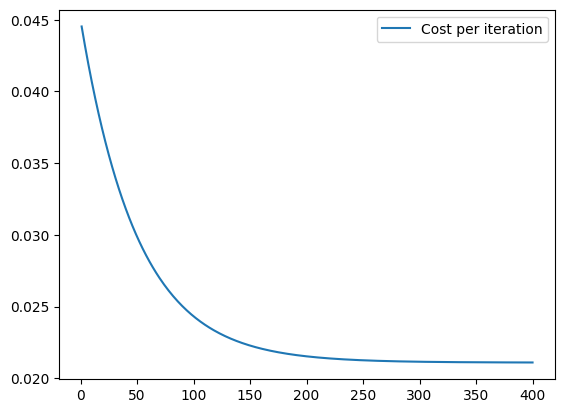

In [11]:
w_init = 0
epochs = 400
lr = 1.0e-2
batch_size = X_simple_train.shape[0]

w_final, J_hist = gradient_descent(X_simple_train, t_simple_train.reshape((t_simple_train.shape[0], 1)), w_init, lr, epochs, batch_size, print_flag=True)
y_train_2 = w_final * X_simple_train.reshape(X_simple_train.shape[0])
y_test_2 = w_final * X_simple_test.reshape(X_simple_test.shape[0])

print(f'w found by gradient descent: ({w_final})')
print("Train error:", mean_squared_error(y_train_2, t_simple_train))
print("Test  error:", mean_squared_error(y_test_2, t_simple_test))

y_test_std = np.sqrt(np.mean(np.square(np.subtract(w_final * X_simple_test, t_simple_test.reshape(t_simple_test.shape[0], 1)))))

X_test_sorted = np.array(sorted(X_simple_test))
y_test_sorted = (X_test_sorted * w_final).reshape(X_test_sorted.shape[0])

X_simple_save2 = X_test_sorted
y_simple_save2 = y_test_sorted

plt.figure(figsize=(12,6))
plt.scatter(X_simple_train, t_simple_train, color='b', s=50, label='Training simple data')
plt.scatter(X_simple_test, t_simple_test, color='r', s=50, label='Testing simple data')
plt.plot(X_test_sorted, y_test_sorted, label='prediction', color='r')
plt.fill_between(
    np.squeeze(X_test_sorted), y_test_sorted - y_test_std, y_test_sorted + y_test_std,
    color="orange", alpha=0.5, label="Standard deviation (std.)")
plt.legend()
plt.show()

plt.plot([i for i in range(1, len(J_hist) + 1)], J_hist, label='Cost per iteration')
plt.legend()
plt.show()

Epoch 40, w = 1.0060635892074024, dj_dw = -6.192660413049111e-06: Cost = 3.8120095e-01
Epoch 80, w = 1.0060637162255972, dj_dw = -7.830625037286154e-13: Cost = 3.8120095e-01
Epoch 120, w = 1.0060637162256132, dj_dw = -4.192202140984591e-15: Cost = 3.8120095e-01
Epoch 160, w = 1.0060637162256132, dj_dw = -4.192202140984591e-15: Cost = 3.8120095e-01
Epoch 200, w = 1.0060637162256132, dj_dw = -4.192202140984591e-15: Cost = 3.8120095e-01
Epoch 240, w = 1.0060637162256132, dj_dw = -4.192202140984591e-15: Cost = 3.8120095e-01
Epoch 280, w = 1.0060637162256132, dj_dw = -4.192202140984591e-15: Cost = 3.8120095e-01
Epoch 320, w = 1.0060637162256132, dj_dw = -4.192202140984591e-15: Cost = 3.8120095e-01
Epoch 360, w = 1.0060637162256132, dj_dw = -4.192202140984591e-15: Cost = 3.8120095e-01
Epoch 400, w = 1.0060637162256132, dj_dw = -4.192202140984591e-15: Cost = 3.8120095e-01
w found by gradient descent: (1.0060637162256132)
Train error: 0.7624019038061555
Test  error: 0.6319480342452622


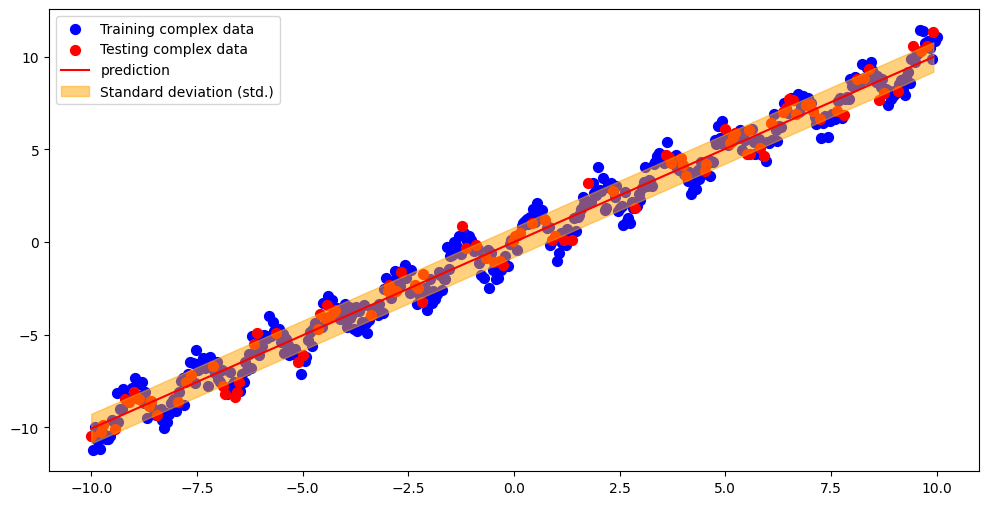

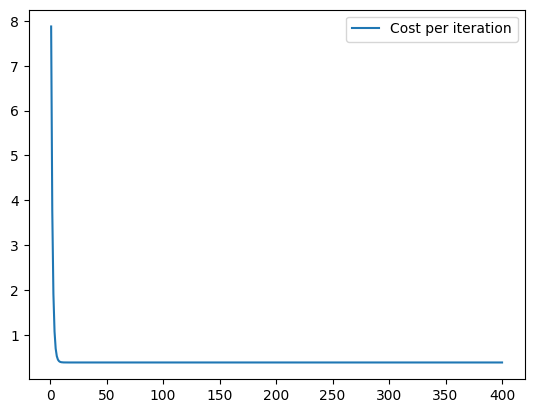

In [12]:
w_init = 0
epochs = 400
lr = 1.0e-2
batch_size = X_complex_train.shape[0]

w_final, J_hist = gradient_descent(X_complex_train, t_complex_train.reshape((t_complex_train.shape[0], 1)), w_init, lr, epochs, batch_size, print_flag=True)
y_train_2 = w_final * X_complex_train.reshape(X_complex_train.shape[0])
y_test_2 = w_final * X_complex_test.reshape(X_complex_test.shape[0])

print(f'w found by gradient descent: ({w_final})')
print("Train error:", mean_squared_error(y_train_2, t_complex_train))
print("Test  error:", mean_squared_error(y_test_2, t_complex_test))

y_test_std = np.sqrt(np.mean(np.square(np.subtract(w_final * X_complex_test, t_complex_test.reshape(t_complex_test.shape[0], 1)))))

X_test_sorted = np.array(sorted(X_complex_test))
y_test_sorted = (X_test_sorted * w_final).reshape(X_test_sorted.shape[0])

X_complex_save2 = X_test_sorted
y_complex_save2 = y_test_sorted

plt.figure(figsize=(12,6))
plt.scatter(X_complex_train, t_complex_train, color='b', s=50, label='Training complex data')
plt.scatter(X_complex_test, t_complex_test, color='r', s=50, label='Testing complex data')
plt.plot(X_test_sorted, y_test_sorted, label='prediction', color='r')
plt.fill_between(
    np.squeeze(X_test_sorted), y_test_sorted - y_test_std, y_test_sorted + y_test_std,
    color="orange", alpha=0.5, label="Standard deviation (std.)")
plt.legend()
plt.show()

plt.plot([i for i in range(1, len(J_hist) + 1)], J_hist, label='Cost per iteration')
plt.legend()
plt.show()

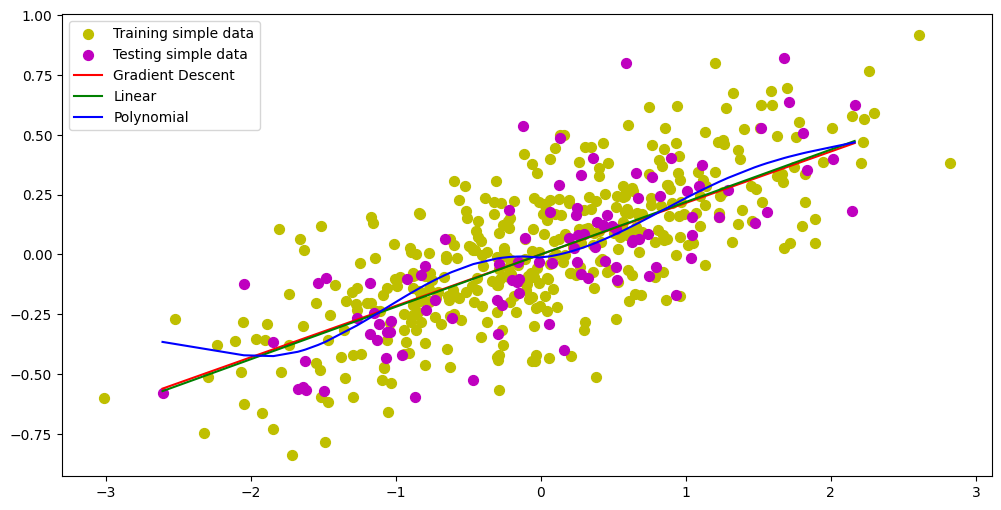

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(X_simple_train, t_simple_train, color='y', s=50, label='Training simple data')
plt.scatter(X_simple_test, t_simple_test, color='m', s=50, label='Testing simple data')
plt.plot(X_simple_save2, y_simple_save2, label='Gradient Descent', color='r')
plt.plot(X_simple_save0, y_simple_save0, label='Linear', color='g')
plt.plot(X_simple_save1, y_simple_save1, label='Polynomial', color='b')
plt.legend()
plt.show()

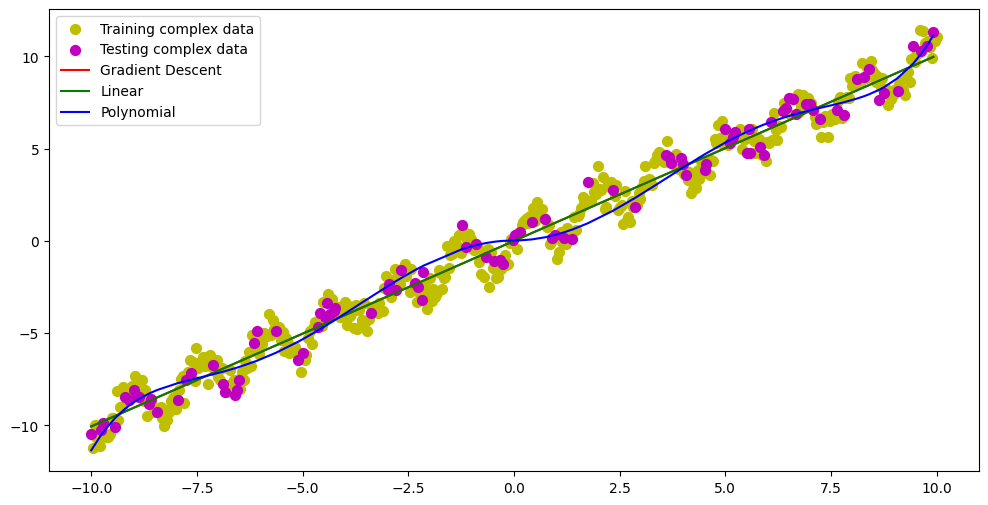

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(X_complex_train, t_complex_train, color='y', s=50, label='Training complex data')
plt.scatter(X_complex_test, t_complex_test, color='m', s=50, label='Testing complex data')
plt.plot(X_complex_save2, y_complex_save2, label='Gradient Descent', color='r')
plt.plot(X_complex_save0, y_complex_save0, label='Linear', color='g')
plt.plot(X_complex_save1, y_complex_save1, label='Polynomial', color='b')
plt.legend()
plt.show()

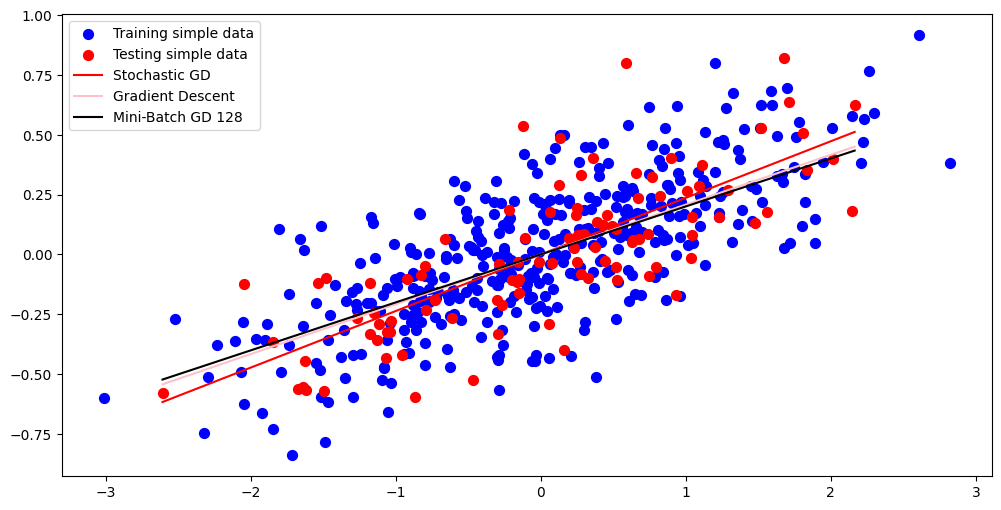

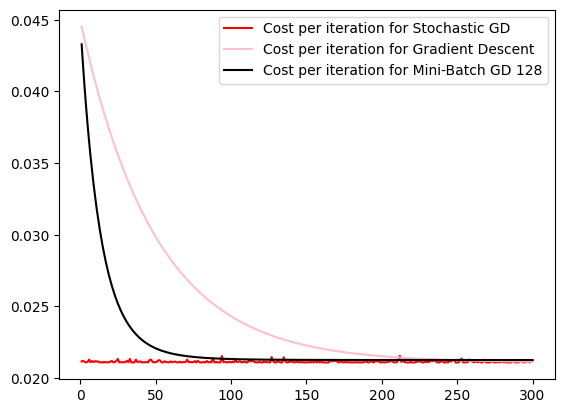

In [15]:
w_init = 0
epochs = 300
learning_rate = 0.01
results = []
hist = []

###############
# SGD compute

w_final, J_hist = SGD(X_simple_train, t_simple_train.reshape((t_simple_train.shape[0], 1)), w_init, learning_rate, epochs, 1)
y_train_3 = w_final * X_simple_train.reshape(X_simple_train.shape[0])
y_test_3 = w_final * X_simple_test.reshape(X_simple_test.shape[0])

X_test_sorted = np.array(sorted(X_simple_test))
y_test_sorted = (X_test_sorted * w_final).reshape(X_test_sorted.shape[0])

results.append((X_test_sorted, y_test_sorted))
hist.append(J_hist)

##############
# Gradient Descent compute

w_final, J_hist = gradient_descent(X_simple_train, t_simple_train.reshape((t_simple_train.shape[0], 1)), w_init, learning_rate, epochs, X_simple_train.shape[0])
y_train = w_final * X_simple_train.reshape(X_simple_train.shape[0])
y_test = w_final * X_simple_test.reshape(X_simple_test.shape[0])

X_test_sorted = np.array(sorted(X_simple_test))
y_test_sorted = (X_test_sorted * w_final).reshape(X_test_sorted.shape[0])

results.append((X_test_sorted, y_test_sorted))
hist.append(J_hist)

##############
# Gradient Descent with 128 batch compute

w_final, J_hist = gradient_descent(X_simple_train, t_simple_train.reshape((t_simple_train.shape[0], 1)), w_init, learning_rate, epochs, 128)
y_train = w_final * X_simple_train.reshape(X_simple_train.shape[0])
y_test = w_final * X_simple_test.reshape(X_simple_test.shape[0])

X_test_sorted = np.array(sorted(X_simple_test))
y_test_sorted = (X_test_sorted * w_final).reshape(X_test_sorted.shape[0])

results.append((X_test_sorted, y_test_sorted))
hist.append(J_hist)

plt.figure(figsize=(12,6))
plt.scatter(X_simple_train, t_simple_train, color='b', s=50, label='Training simple data')
plt.scatter(X_simple_test, t_simple_test, color='r', s=50, label='Testing simple data')

plt.plot(results[0][0], results[0][1], label='Stochastic GD', color='r')
plt.plot(results[1][0], results[1][1], label='Gradient Descent', color='pink')
plt.plot(results[2][0], results[2][1], label='Mini-Batch GD 128', color='black')
    
plt.legend()
plt.show()

plt.plot([i for i in range(1, len(hist[0]) + 1)], hist[0], label='Cost per iteration for ' + 'Stochastic GD', color='r')
plt.plot([i for i in range(1, len(hist[1]) + 1)], hist[1], label='Cost per iteration for ' + 'Gradient Descent', color='pink')
plt.plot([i for i in range(1, len(hist[2]) + 1)], hist[2], label='Cost per iteration for ' + 'Mini-Batch GD 128', color='black')
   
plt.legend()
plt.show()

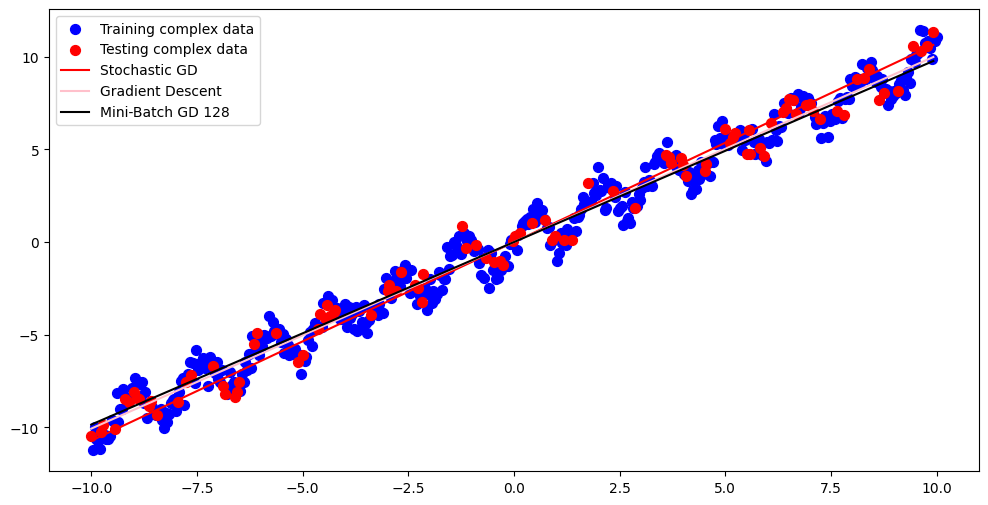

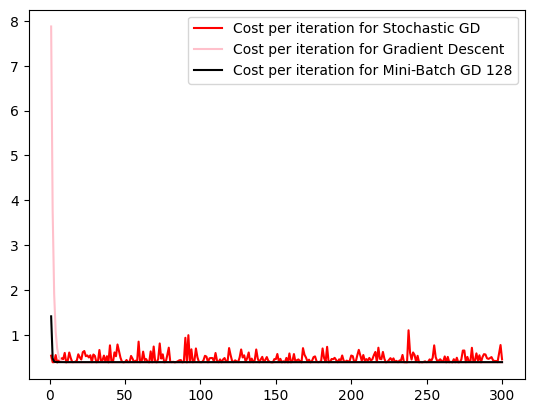

In [16]:
w_init = 0
epochs = 300
learning_rate = 0.01
results = []
hist = []

###############
# SGD compute

w_final, J_hist = SGD(X_complex_train, t_complex_train.reshape((t_complex_train.shape[0], 1)), w_init, learning_rate, epochs, 1)
y_train_3 = w_final * X_complex_train.reshape(X_complex_train.shape[0])
y_test_3 = w_final * X_complex_test.reshape(X_complex_test.shape[0])

X_test_sorted = np.array(sorted(X_complex_test))
y_test_sorted = (X_test_sorted * w_final).reshape(X_test_sorted.shape[0])

results.append((X_test_sorted, y_test_sorted))
hist.append(J_hist)

##############
# Gradient Descent compute

w_final, J_hist = gradient_descent(X_complex_train, t_complex_train.reshape((t_complex_train.shape[0], 1)), w_init, learning_rate, epochs, X_complex_train.shape[0])
y_train = w_final * X_complex_train.reshape(X_complex_train.shape[0])
y_test = w_final * X_complex_test.reshape(X_complex_test.shape[0])

X_test_sorted = np.array(sorted(X_complex_test))
y_test_sorted = (X_test_sorted * w_final).reshape(X_test_sorted.shape[0])

results.append((X_test_sorted, y_test_sorted))
hist.append(J_hist)

##############
# Gradient Descent with 128 batch compute

w_final, J_hist = gradient_descent(X_complex_train, t_complex_train.reshape((t_complex_train.shape[0], 1)), w_init, learning_rate, epochs, 128)
y_train = w_final * X_complex_train.reshape(X_complex_train.shape[0])
y_test = w_final * X_complex_test.reshape(X_complex_test.shape[0])

X_test_sorted = np.array(sorted(X_complex_test))
y_test_sorted = (X_test_sorted * w_final).reshape(X_test_sorted.shape[0])

results.append((X_test_sorted, y_test_sorted))
hist.append(J_hist)

plt.figure(figsize=(12,6))
plt.scatter(X_complex_train, t_complex_train, color='b', s=50, label='Training complex data')
plt.scatter(X_complex_test, t_complex_test, color='r', s=50, label='Testing complex data')

plt.plot(results[0][0], results[0][1], label='Stochastic GD', color='r')
plt.plot(results[1][0], results[1][1], label='Gradient Descent', color='pink')
plt.plot(results[2][0], results[2][1], label='Mini-Batch GD 128', color='black')
    
plt.legend()
plt.show()

plt.plot([i for i in range(1, len(hist[0]) + 1)], hist[0], label='Cost per iteration for ' + 'Stochastic GD', color='r')
plt.plot([i for i in range(1, len(hist[1]) + 1)], hist[1], label='Cost per iteration for ' + 'Gradient Descent', color='pink')
plt.plot([i for i in range(1, len(hist[2]) + 1)], hist[2], label='Cost per iteration for ' + 'Mini-Batch GD 128', color='black')
   
plt.legend()
plt.show()